## 1: Face Recognition, but not evil this time

Using the faces dataset in:

```
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
```

If you use the `faces.target` and `faces.target_names` attributes, you can build a facial recognition algorithm.

Use sklearn **gridsearch** (or an equivalent, like random search) to optimize the model for accuracy. Try both a SVM-based classifier and a logistic regression based classifier (with a feature pipeline of your choice) to get the best model. You should have at least 80% accuracy.

In [ ]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [ ]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [ ]:
faces.keys()

In [ ]:
X = faces['data']
y = faces['target']
print(X.shape,y.shape)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

pipe1 = Pipeline([
    ('sscaler',StandardScaler()),
    ('pca',PCA()),
    ('sscaler2',StandardScaler()),
    ('svc', SVC())   
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
             'pca__n_components': [100,200],
             'svc__C': [1e3, 5e3, 1e4, 5e4],
             'svc__gamma':[0.0001, 0.1]
             }

In [7]:
grid1 = GridSearchCV(pipe1,param_grid,cv = 4,verbose=1)

In [8]:
grid1.fit(X_train, y_train)
model = grid1.best_estimator_

predict = model.predict(X_test)
print(grid1.best_params_)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:   49.5s finished


{'pca__n_components': 200, 'svc__C': 5000.0, 'svc__gamma': 0.0001}


In [9]:
print(model.score(X_test,y_test))

0.7925925925925926


# 2: Bag of Words, Bag of Popcorn

By this point, you are ready for the [Bag of Words, Bag of Popcorn](https://www.kaggle.com/c/word2vec-nlp-tutorial/data) competition. 

Use NLP feature pre-processing (using, SKLearn, Gensim, Spacy or Hugginface) to build the best classifier you can. Use a  feature pipeline, and gridsearch for your final model.

A succesful project should get 90% or more on a **holdout** dataset you kept for yourself.

In [10]:
import pandas as pd
import string
from nltk.corpus import stopwords

df = pd.read_csv('labeledTrainData.tsv', sep='\t')
df.drop(columns='id',axis=1,inplace=True)

In [11]:
df['length'] = df['review'].apply(len)
df

,sentiment,review,length
0,1,With all this stuff going down at the moment w...,2302
1,1,"\The Classic War of the Worlds\"" by Timothy Hi...",946
2,0,The film starts with a manager (Nicholas Bell)...,2449
3,0,It must be assumed that those who praised this...,2245
4,1,Superbly trashy and wondrously unpretentious 8...,2231
...,...,...,...
24995,0,It seems like more consideration has gone into...,580
24996,0,I don't believe they made this film. Completel...,975
24997,0,"Guy is a loser. Can't get girls, needs to buil...",641
24998,0,This 30 minute documentary Buñuel made in the ...,1141


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Gensim + KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')

In [18]:
words = df['review'].str.split()
words = pd.DataFrame(words.tolist())

In [19]:
import re

replaceDict = dict({
'{':" ", '}':" ", ',':"", '.':" ", '!':" ", '\\':" ", '/':" ", '$':" ", '%':" ",
'^':" ", '?':" ", '\'':" ", '"':" ", '(':" ", ')':" ", '*':" ", '+':" ", '-':" ",
'=':" ", ':':" ", ';':" ", ']':" ", '[':" ", '`':" ", '~':" ",
})

rep = dict((re.escape(k), v) for k, v in replaceDict.items())
pattern = re.compile("|".join(rep.keys()))
def replacer(text):
    return rep[re.escape(text.group(0))]

words = df['review'].str.replace(pattern, replacer).str.lower().str.split()
words = pd.DataFrame(words.tolist())
words

,0,1,2,3,4,5,6,7,8,9,...,2509,2510,2511,2512,2513,2514,2515,2516,2517,2518
0,with,all,this,stuff,going,down,at,the,moment,with,...,None,None,None,None,None,None,None,None,None,None
1,the,classic,war,of,the,worlds,by,timothy,hines,is,...,None,None,None,None,None,None,None,None,None,None
2,the,film,starts,with,a,manager,nicholas,bell,giving,welcome,...,None,None,None,None,None,None,None,None,None,None
3,it,must,be,assumed,that,those,who,praised,this,film,...,None,None,None,None,None,None,None,None,None,None
4,superbly,trashy,and,wondrously,unpretentious,80,s,exploitation,hooray,the,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,it,seems,like,more,consideration,has,gone,into,the,imdb,...,None,None,None,None,None,None,None,None,None,None
24996,i,don,t,believe,they,made,this,film,completely,unnecessary,...,None,None,None,None,None,None,None,None,None,None
24997,guy,is,a,loser,can,t,get,girls,needs,to,...,None,None,None,None,None,None,None,None,None,None
24998,this,30,minute,documentary,buñuel,made,in,the,early,1930,...,None,None,None,None,None,None,None,None,None,None


In [20]:
def soft_get(w):
    try:
        return wv[w]
    except KeyError:
        return np.zeros(wv.vector_size)
def map_vectors(row):
    try:
        return np.sum(
            row.loc[row.notna()].apply(soft_get)
        )
    except:
        return np.zeros(wv.vector_size)
emb = pd.DataFrame(words.apply(map_vectors, axis=1))
print(emb)
emb.columns = ['C']
emb = pd.DataFrame(np.array(emb.C.apply(pd.Series)))

                                                       0
0      [17.283424377441406, 11.937847137451172, 18.50...
1      [4.77899169921875, 6.74494743347168, 3.5442886...
2      [7.668853759765625, 18.400442123413086, 2.1170...
3      [13.43841552734375, 9.676690101623535, 3.18444...
4      [17.447418212890625, 9.209012031555176, 8.3933...
...                                                  ...
24995  [4.8431396484375, 3.083902359008789, 0.0447769...
24996  [5.86322021484375, 2.340229034423828, 2.210128...
24997  [2.1606979370117188, 3.7890892028808594, -0.08...
24998  [9.051055908203125, 3.2181758880615234, 9.6830...
24999  [5.10003662109375, 7.309170722961426, -0.03271...

[25000 rows x 1 columns]


In [21]:
emb

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,17.283424,11.937847,18.506580,45.120676,-24.435819,3.551744,12.055645,-27.254570,30.983692,19.554092,...,-24.531746,23.092484,-33.328987,9.722412,-26.716827,-10.303997,2.579872,-19.129990,11.317310,-4.080734
1,4.778992,6.744947,3.544289,15.174940,-8.201431,0.314445,4.249725,-9.231554,7.977154,8.119308,...,-12.727188,3.146690,-12.804749,3.808205,-6.146217,-2.835491,-0.495293,-4.693481,4.241936,-0.824364
2,7.668854,18.400442,2.117029,24.500671,-17.646823,-1.491764,3.763025,-24.287819,18.558378,24.320732,...,-23.039650,6.284547,-23.298676,15.287937,-12.791531,-5.257778,2.578659,-12.364639,8.910461,4.143981
3,13.438416,9.676690,3.184448,28.120438,-22.092400,3.097771,14.640491,-28.468567,23.722717,22.710403,...,-25.556366,4.002686,-23.584404,9.610126,-10.111442,-2.726578,3.336586,-10.713562,16.601911,3.251701
4,17.447418,9.209012,8.393372,27.671641,-22.164581,1.606564,11.384158,-23.531187,22.702066,23.904671,...,-24.457840,10.056759,-29.204399,6.255138,-14.498840,-0.895094,6.454372,-19.625992,0.599186,1.965607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,4.843140,3.083902,0.044777,8.552612,-7.245542,1.479004,4.257339,-4.647678,4.680054,2.775642,...,-5.378468,6.225250,-7.275024,3.712402,-4.262329,-1.908768,4.530167,-3.873884,-0.512589,0.154842
24996,5.863220,2.340229,2.210129,12.314983,-7.772020,1.114616,10.503281,-13.057060,13.101852,12.770050,...,-15.988598,6.903183,-15.212250,2.484120,-5.440849,-1.743176,2.057991,-6.311344,6.623047,-2.365334
24997,2.160698,3.789089,-0.081245,13.001617,-8.620522,-1.689472,2.976837,-6.946411,7.065413,7.312721,...,-7.426193,9.140686,-10.666756,4.078735,-6.753197,0.665543,-0.919044,-7.831268,3.209351,-2.725433
24998,9.051056,3.218176,9.683090,16.531189,-7.922881,3.315762,9.002274,-17.094444,12.638168,7.161171,...,-16.743801,0.952118,-15.382585,2.369106,-11.096809,-1.904205,-0.214203,-5.103699,12.709579,-2.317215


In [22]:
sscaler = StandardScaler()
sscaler.fit(emb)

StandardScaler()

In [23]:
scaled_features = sscaler.transform(emb)

X_train1, X_test1, y_train1, y_test1 = train_test_split(scaled_features,df['sentiment'],
                                                    test_size=0.30, random_state=42)

In [24]:
knn = KNeighborsClassifier(n_neighbors=1)

In [29]:
knn.fit(X_train1,y_train1)

KNeighborsClassifier(n_neighbors=1)

In [30]:
pred_knn = knn.predict(X_test1)

In [31]:
print(confusion_matrix(y_test1,pred_knn))

[[2681 1057]
 [1262 2500]]


In [33]:
print(classification_report(y_test1,pred_knn))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      3738
           1       0.70      0.66      0.68      3762

    accuracy                           0.69      7500
   macro avg       0.69      0.69      0.69      7500
weighted avg       0.69      0.69      0.69      7500



In [36]:
error_rate = []

# Will take some time
for i in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train1,y_train1)
    pred_i = knn.predict(X_test1)
    error_rate.append(np.mean(pred_i != y_test1))

Text(0, 0.5, 'Error Rate')

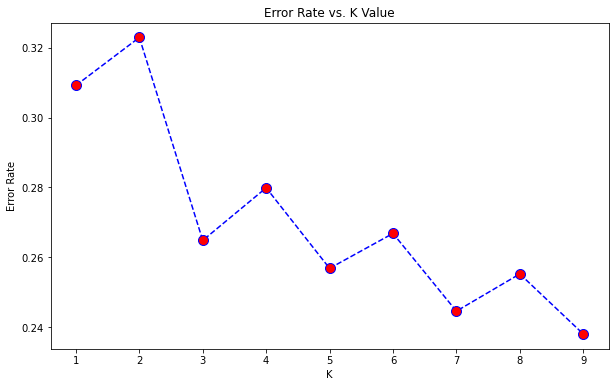

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [62]:
knn15 = KNeighborsClassifier(n_neighbors=100)
knn15.fit(X_train1,y_train1)

KNeighborsClassifier(n_neighbors=100)

In [63]:
pred_knn15 = knn15.predict(X_test1)

In [64]:
print(confusion_matrix(y_test1,pred_knn15))

[[3353  385]
 [1315 2447]]


In [65]:
print(classification_report(y_test1,pred_knn15))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80      3738
           1       0.86      0.65      0.74      3762

    accuracy                           0.77      7500
   macro avg       0.79      0.77      0.77      7500
weighted avg       0.79      0.77      0.77      7500



# Count Vectorizer + Random Forest

In [66]:
msg_train, msg_test, label_train, label_test = train_test_split(df['review'], df['sentiment'], test_size=0.3, random_state=42)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

17500 7500 25000


In [67]:
# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = 'word',   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 


train_data_features = vectorizer.fit_transform(msg_train)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()

In [ ]:
train_data_features.shape

In [68]:
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 150,criterion = 'entropy',verbose=4,max_features='sqrt') 

forest = forest.fit(train_data_features, label_train )

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 150


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


building tree 2 of 150


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


building tree 3 of 150


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.9s remaining:    0.0s


building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
building tree 43 of 150
building tree 44 of 150
building tree 45 of 15

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  1.4min finished


In [69]:
test_data_features = vectorizer.transform(msg_test)
test_data_features = test_data_features.toarray()

In [70]:
result = forest.predict(test_data_features)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.0s finished


In [71]:
print(classification_report(label_test,result))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      3738
           1       0.84      0.85      0.85      3762

    accuracy                           0.85      7500
   macro avg       0.85      0.85      0.85      7500
weighted avg       0.85      0.85      0.85      7500



In [72]:
print(confusion_matrix(label_test,result))

[[3147  591]
 [ 549 3213]]


# TfidfVectorizer + Random Forest

In [117]:
tfidf_vectorizer = TfidfVectorizer(analyzer = 'word',   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

In [118]:
tfidf_train_data_features = tfidf_vectorizer.fit_transform(msg_train)

tfidf_train_data_features = tfidf_train_data_features.toarray()

In [119]:
tfidf_forest = RandomForestClassifier(n_estimators = 100) 

tfidf_forest = tfidf_forest.fit(tfidf_train_data_features, label_train )

In [120]:
tfidf_test_data_features = tfidf_vectorizer.transform(msg_test)
tfidf_test_data_features = tfidf_test_data_features.toarray()

In [121]:
tfidf_result = tfidf_forest.predict(tfidf_test_data_features)

In [122]:
print(classification_report(label_test,tfidf_result))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      3738
           1       0.85      0.83      0.84      3762

    accuracy                           0.84      7500
   macro avg       0.84      0.84      0.84      7500
weighted avg       0.84      0.84      0.84      7500



In [123]:
print(confusion_matrix(label_test,tfidf_result))

[[3186  552]
 [ 623 3139]]


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

# Count Vectorizer + Multinomial NB/Naive Bayes

In [73]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer="word")),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [74]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [75]:
predictions_pipe = pipeline.predict(msg_test)

In [76]:
print(confusion_matrix(label_test,predictions_pipe))

[[3309  429]
 [ 603 3159]]


In [77]:
print(classification_report(label_test,predictions_pipe))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      3738
           1       0.88      0.84      0.86      3762

    accuracy                           0.86      7500
   macro avg       0.86      0.86      0.86      7500
weighted avg       0.86      0.86      0.86      7500



# TfidfVectorizer + MultinomialNB

In [103]:
pipeline3 = Pipeline([
    ('bow', TfidfVectorizer(analyzer="word")),  # strings to token integer counts
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [104]:
pipeline3.fit(msg_train,label_train)

Pipeline(steps=[('bow', TfidfVectorizer()), ('classifier', MultinomialNB())])

In [105]:
predictions_NB = pipeline3.predict(msg_test)

In [106]:
print(classification_report(label_test,predictions_NB))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      3738
           1       0.88      0.84      0.86      3762

    accuracy                           0.86      7500
   macro avg       0.86      0.86      0.86      7500
weighted avg       0.86      0.86      0.86      7500



# TFIDFVectorizer + Logistic Regression

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [79]:
pipeline1 = Pipeline([
    ('bow', TfidfVectorizer(analyzer="word")),
    ('reg',LogisticRegression())
])

In [80]:
pipeline1.fit(msg_train,label_train)

Pipeline(steps=[('bow', TfidfVectorizer()), ('reg', LogisticRegression())])

In [81]:
y_preds = pipeline1.predict(msg_test)

In [82]:
print(accuracy_score(label_test,y_preds))

0.8890666666666667


In [83]:
print(classification_report(label_test,y_preds))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      3738
           1       0.88      0.90      0.89      3762

    accuracy                           0.89      7500
   macro avg       0.89      0.89      0.89      7500
weighted avg       0.89      0.89      0.89      7500



# TfidfVectorizer + SVC(Winner)

In [112]:
pipeline2 = Pipeline([
    ('bow', TfidfVectorizer(analyzer="word")),
    ('reg', SVC())
])

In [113]:
pipeline2.fit(msg_train,label_train)

Pipeline(steps=[('bow', TfidfVectorizer()), ('reg', SVC())])

In [114]:
y_preds2 = pipeline2.predict(msg_test)

In [115]:
print(accuracy_score(label_test,y_preds2))

0.896


In [116]:
print(classification_report(label_test,y_preds2))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      3738
           1       0.89      0.90      0.90      3762

    accuracy                           0.90      7500
   macro avg       0.90      0.90      0.90      7500
weighted avg       0.90      0.90      0.90      7500

